<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Armado-del-índice" data-toc-modified-id="Armado-del-índice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Armado del índice</a></span></li><li><span><a href="#Fondos-apalancados" data-toc-modified-id="Fondos-apalancados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fondos apalancados</a></span><ul class="toc-item"><li><span><a href="#Advertencia" data-toc-modified-id="Advertencia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Advertencia</a></span></li></ul></li><li><span><a href="#Deterioro" data-toc-modified-id="Deterioro-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deterioro</a></span><ul class="toc-item"><li><span><a href="#La-causa" data-toc-modified-id="La-causa-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>La causa</a></span></li><li><span><a href="#La-complicación" data-toc-modified-id="La-complicación-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>La complicación</a></span></li></ul></li><li><span><a href="#A-mas-volatilidad,-más-deterioro" data-toc-modified-id="A-mas-volatilidad,-más-deterioro-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A mas volatilidad, más deterioro</a></span></li><li><span><a href="#La-solución" data-toc-modified-id="La-solución-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>La solución</a></span></li></ul></div>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook

# Deterioro en Fondos apalancados
En el presente estudio, repasaremos el proceso conocido como deterioro o *beta decay* para fondos apalancados.

A tal propósito proponemos un proceso estocástico como índice *benchmark*.
En segunda instancia, evaluamos los rendimientos de un fondo apalancado, basado en este benchmark.  
Luego, estimamos su deterioro y sugerimos la aproximación para su eliminación.

## Armado del índice
Para representar el índice
El proceso estocástico a utilizar es una caminata aleatoria Gaussiana. Esta se caracteriza por ser un proceso discreto en el cual cada paso es un 

$$ \large Z=\sum_{t=0}^{T} {X_i}$$  

donde $$ \large X_i \sim {iid \, \mathcal{N}(0, \sigma)} $$  
Es decir, ante cada paso, hay una innovación normal independiente de las previas.    

Este proceso, cuando $\Delta t \to 0$, el proceso converge a un proceso de Weiner, en tiempo contínuo.   
  
  
La caminata aleatoria es una *martingala*, lo cual implica que su valor esperado para el próximo paso es igual a su valor presente.  
En la práctica, esto implica que el proceso es una colocación "actuarialmente justa", no tiene expectativa condicional de ganancia o pérdida respecto al valor actual.  
    
    
Existen diversos índices financieros que pueden tomarse como ejemplos alternativos, por ejemplo el S&P500 (replicado por el ETF **SPY**), el NASDAQ (ETF: **QQQ**), o el Merval.  
   
   
Sin embargo, el comportamiento de estos índices difiere fuertemente de la caminata aleatoria ya que las distribuciones marginales no son normales y existe heterocedasticidad condicional autorregresiva (efectos ARCH), entre otras diferencias.


In [2]:
df=pd.DataFrame()
days = 1000
df['daily_returns'] = np.random.standard_normal(days)/100
df['daily_returns'][0]=0
df['cum_result']=(df['daily_returns']+1).cumprod()

<IPython.core.display.Javascript object>


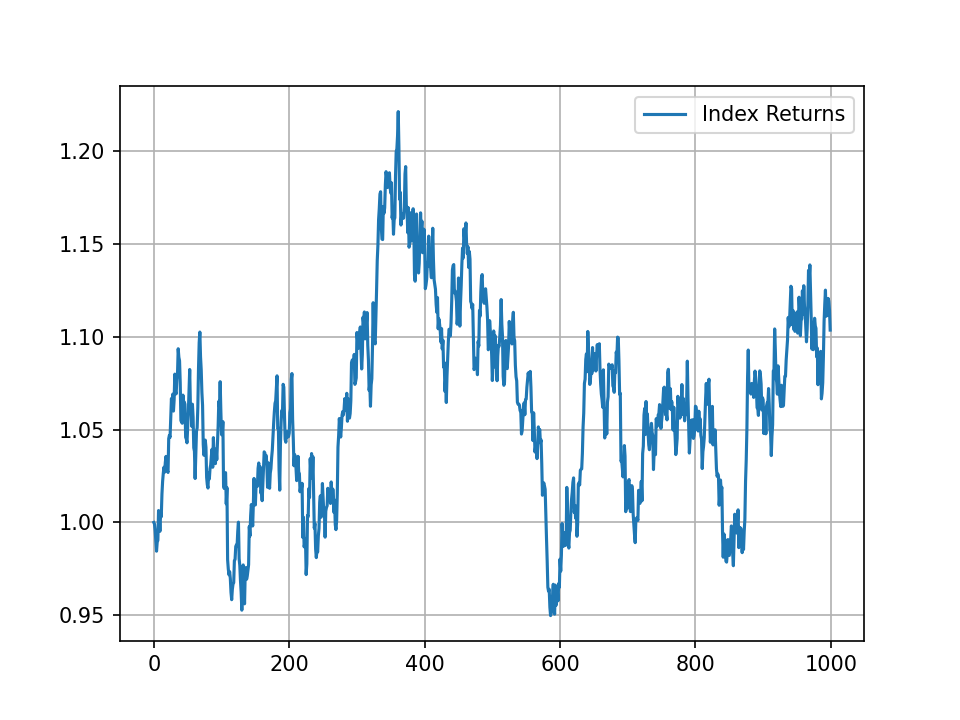

In [5]:
plt.plot(df['cum_result'], label='Index Returns')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
cum_ret = (df['cum_result'].iloc[-1]-1)
print(f'El retorno acumulado a través de los {days} dias fue de {cum_ret*100:.2f}%')

El retorno acumulado a través de los 1000 dias fue de 10.36%


## Fondos apalancados
A su vez, existen fondos que apuntan a generar un múltiplo de los rendimientos diarios de estos índices.  
Por ejemplo, para el índice S&P500:
* El ETF **UPRO** busca triplicar el rendimiento diario  
  * Factor de apalancamiento = $3$x 
* El ETF **SH** busca tener el rendimiento inverso al índice  

  * Apalancamiento = $-1$x
  
Mostramos los rendimientos apalancados por un factor de $3$ relativos al índice.

### Advertencia
Estos fondos, dadas sus características de apalancamiento y deterioro, son de altísimo riesgo, y sólo deberán ser utilizados previa asesoría por un profesional financiero. Este trabajo tiene como objetivo exclusivo la divulgación y no constituye una recomendación de inversión.

<IPython.core.display.Javascript object>


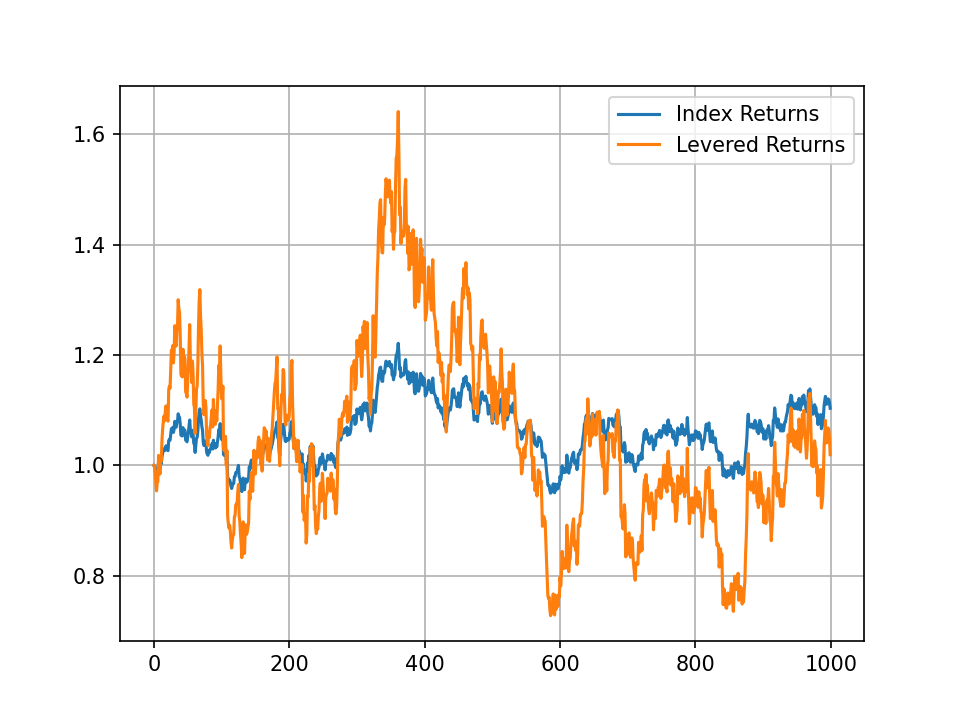

In [10]:
leverage = 3
df['levered_cum_result'] = (df['daily_returns']*leverage+1).cumprod()


plt.plot(df['cum_result'], label='Index Returns')
plt.plot(df['levered_cum_result'], label='Levered Returns')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
fin_lev=df['levered_cum_result'].iloc[-1]-1
print(f'El rendimiento del índice fue de {cum_ret*100:.2f}% ',\
      f'mientras que el fondo apalancado {leverage} veces rindió {fin_lev*100:.2f}%')

El rendimiento del índice fue de 10.36%  mientras que el fondo apalancado 3 veces rindió 1.95%


## Deterioro
Al sostener estos activos en el largo plazo, nos exponemos al deterioro.  
Esto ocurre por la *capitalización diaria* de estos productos.
Imaginemos dos días con subas del 2%.
$$(1+2\%)(1+2\%)-1=4.04\%$$

Si no hubiera deterioro, esperaríamos que nuestro fondo $3$x rinda
$$3(4.04\%)=12.12\%$$

Sin embargo, nos encontramos que rindió:
$$(1+3\cdot 2\%)(1+3\cdot 2\%)-1=12.36\%$$  

### La causa
Esta diferencia se debe a que el fondo apalancado capitalizó más rápidamente.
Es decir, si poníamos 100 en ambos fondos, los saldos serían de 102 y 106 luego del primer día. Entonces, las ganancias del segundo día se generan sobre distintos montos.  
Es decir, $$102\cdot2\%=2.04$$ mientras que $$106 \cdot (3\cdot2\%)=6.36 > 2.04 \cdot 3$$

Podemos calcular el deterioro como:
$$ \large d = rl - (ri \cdot L) $$
Donde $rl$ es el rendimiento apalancado, $ri$ es el rendimiento del índice y $L$ el factor de apalancamiento.  
Vemos que el deterioro aumenta con el tiempo de tenencia sin rebalanceo.

<IPython.core.display.Javascript object>


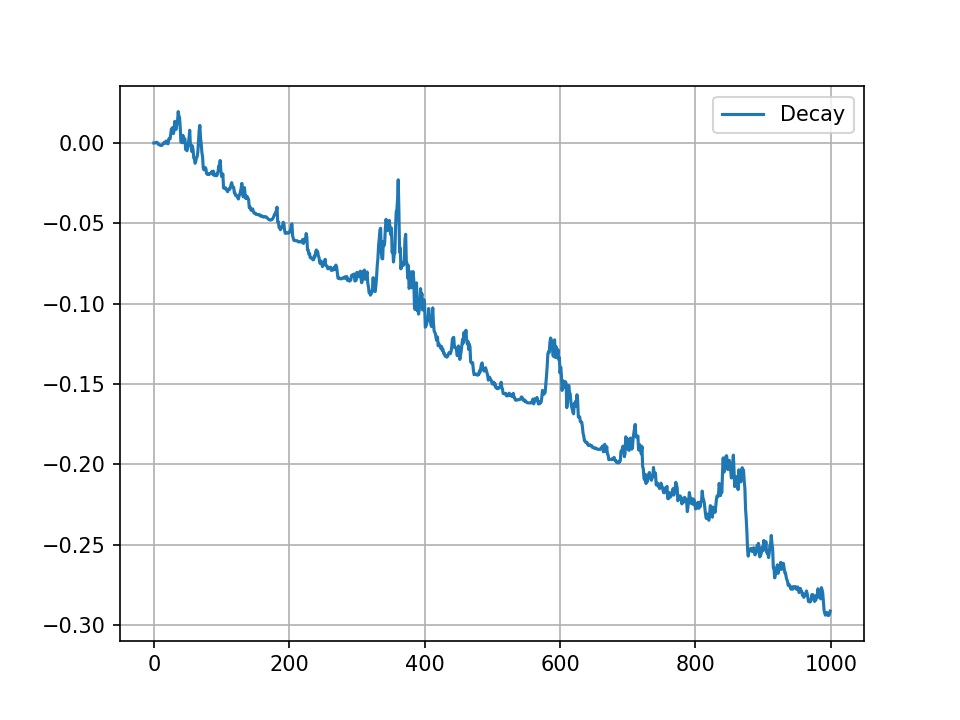

In [15]:
df['decay']=(df['levered_cum_result']-1)-(df['cum_result']-1)*leverage
plt.plot(df['decay'], label='Decay')
plt.grid()
plt.legend()
plt.show()

### La complicación
El deterioro tiene la característica de ser dependiente en trayectoria (*path dependent*). 
Es decir, el deterioro que se observe depende de la secuencia específica de rendimientos.
Viendo todo en conjunto:

In [13]:
fin_decay=df['decay'].iloc[-1]
print(f'El deterioro al final de la muestra fue de {fin_decay*100:.2f}%')

El deterioro al final de la muestra fue de -29.13%


<IPython.core.display.Javascript object>


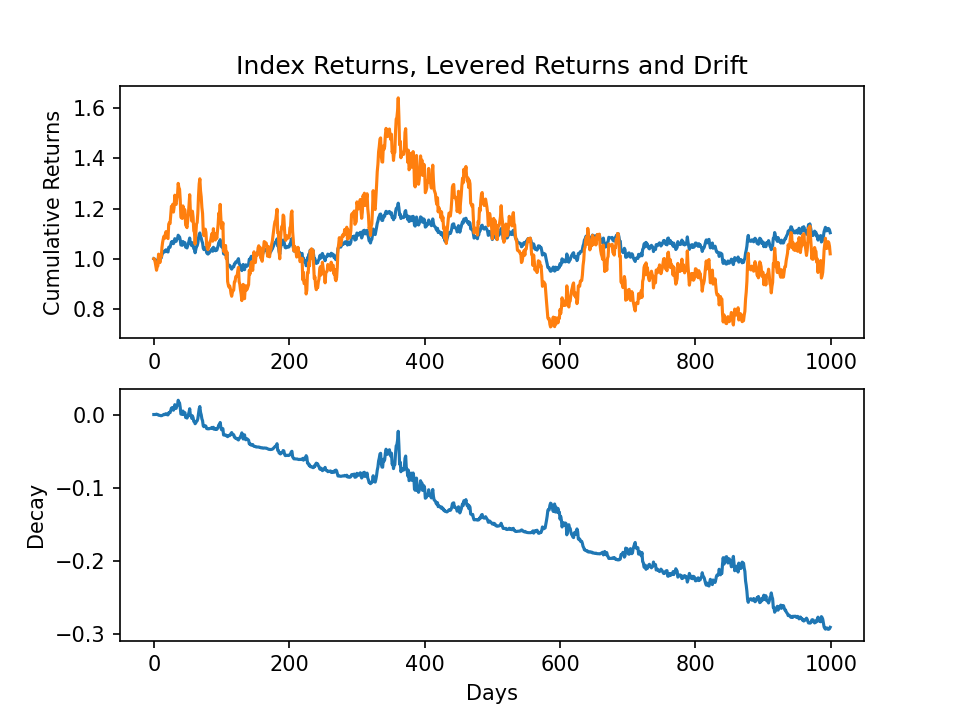

In [16]:
plt.subplot(2, 1, 1)
plt.plot(df['cum_result'], label='Index Returns')
plt.plot(df['levered_cum_result'], label='Levered Returns')
plt.title('Index Returns, Levered Returns and Drift')
plt.ylabel('Cumulative Returns')

plt.subplot(2, 1, 2)
plt.plot(df['decay'])
plt.xlabel('Days')
plt.ylabel('Decay')

plt.show()

## A mas volatilidad, más deterioro
Comparamos el deterioro de un fondo con un índice subyacente con el doble de volatilidad y la misma realización de pasos.  
Observamos rápidamente que el deterioro es una función creciente de la volatilidad.

<IPython.core.display.Javascript object>


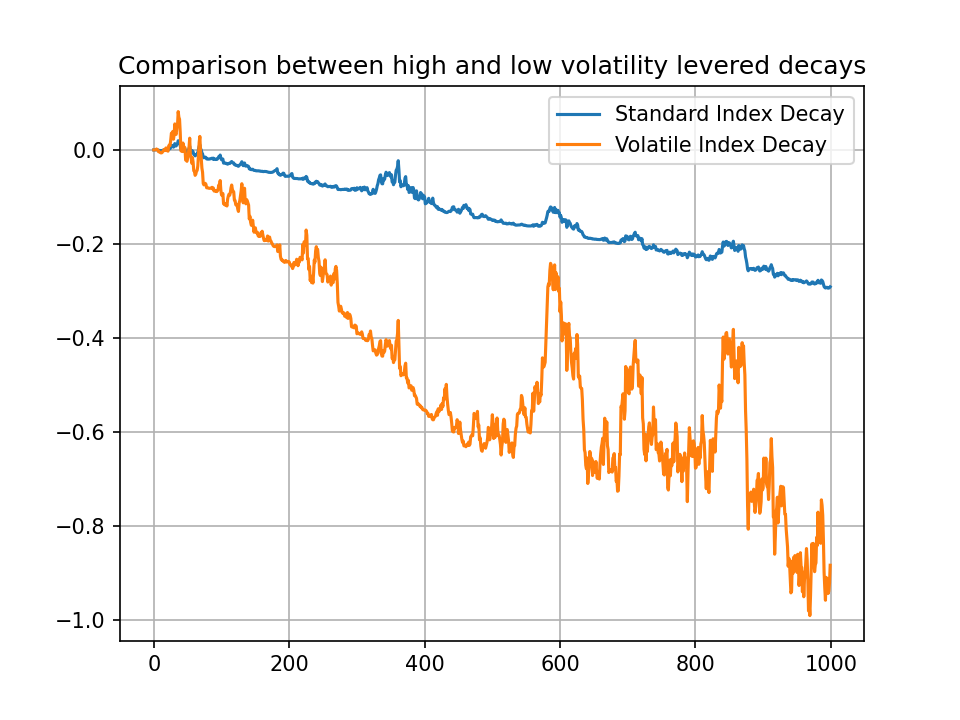

In [17]:
vol_factor=2

df['vol_returns'] = df['daily_returns']*vol_factor
df['vol_returns'][0]=0
df['vol_cum_result']=(df['vol_returns']+1).cumprod()
df['vol_levered_cum_result'] = (df['vol_returns']*leverage+1).cumprod()
df['vol_decay']=(df['vol_levered_cum_result']-1)-(df['vol_cum_result']-1)*leverage

plt.plot(df['decay'], label='Standard Index Decay')
plt.plot(df['vol_decay'], label='Volatile Index Decay')
plt.title('Comparison between high and low volatility levered decays')
plt.grid()
plt.legend()
plt.show()

Por lo tanto, un fondo como **TECL**, que busca generar un rendimiento $3$x del índice de tecnológicas del NASDAQ está mucho más expuesto al deterioro que un fondo como **TMF**, que busca triplicar el rendimiento de bonos del Tesoro de larga duración.

## La solución
El fondo ideal no tendría desvío. Esto es, $\large d=0 \,\,\forall \,\,t$.  
  
  Cómo aproximar esta característica?
  
 El desvío se produce por la **capitalización diaria** del fondo.  
   
 Por esto, para corregirlo, debemos hacer *rebalanceos*: correcciones diarias en el monto del fondo  que reestablezcan la base original para el próximo día.
 <br /> 
 <br /> 
 Volviendo a nuestro ejemplo anterior:  
   
Esperábamos que nuestro fondo $3$x rinda
$$3\cdot(4.04\%)=12.12\%$$

Por lo tanto, deberiamos rebalancear entre el primer día y el segundo:
$$(1+3\cdot 2\%)\cdot(1-0.214\%)\cdot(1+3\cdot 2\%)-1=12.12\%$$   
  
Esta resta de fondos que debemos hacerle es equivalente al deterioro generado entre un día y otro.  
<br /> 
<br /> 
Para mantener el deterioro en 0, cuando el fondo genera ganancias, deberemos restar fondos, e incorporarlos cuando genera pérdidas.   
Este rebalanceo logra que el monto de base sobre el cual buscamos generar los rendimientos sea siempre el mismo.

In [21]:
df['ideal_rebalance']=((df['cum_result']-1)*leverage)+1
df['rebal_balance']=(df['levered_cum_result']-df['ideal_rebalance'])-(df['levered_cum_result']-df['ideal_rebalance']).shift()

In [27]:
fin_reblev=df['ideal_rebalance'].iloc[-1]-1
print(f'El rendimiento del índice fue de {cum_ret*100:.2f}% ',\
      f'mientras que el fondo apalancado {leverage} veces y rebalanceado rindió {fin_reblev*100:.2f}%.')

El rendimiento del índice fue de 10.36%  mientras que el fondo apalancado 3 veces y rebalanceado rindió 31.08%.


<IPython.core.display.Javascript object>


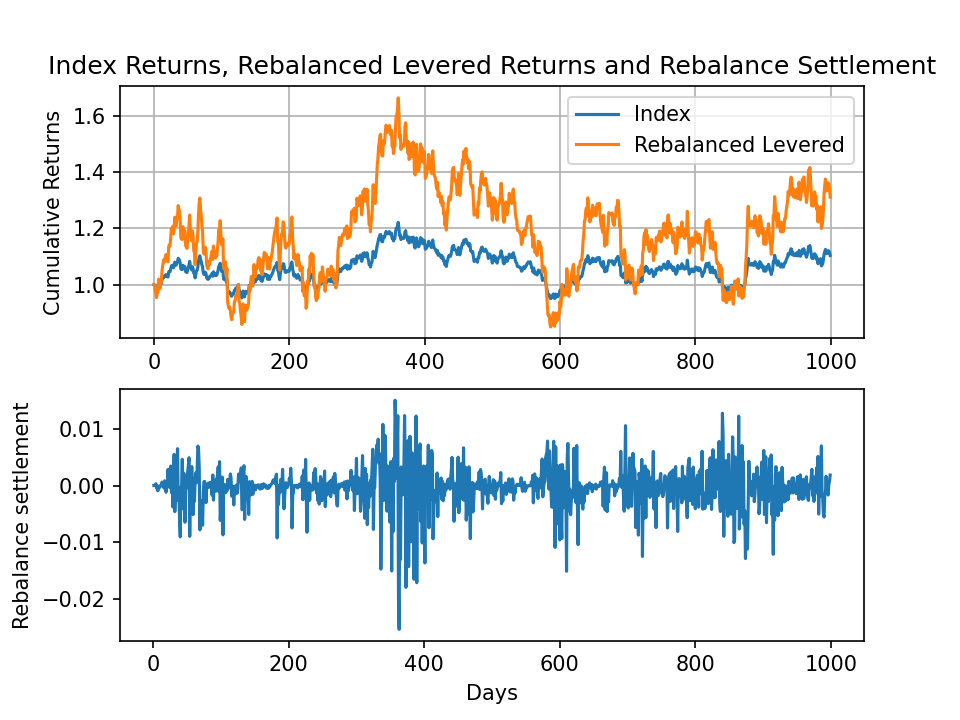

In [46]:
plt.figure()
ax1=plt.subplot(2, 1, 1)
ax1.plot(df['cum_result'], label='Index')
ax1.plot(df['ideal_rebalance'], label='Rebalanced Levered')
plt.title('Index Returns, Rebalanced Levered Returns and Rebalance Settlement')
ax1.set_ylabel('Cumulative Returns')
ax1.legend()
ax1.grid()

ax2=plt.subplot(2, 1, 2)
ax2.plot(df['rebal_balance'])
ax2.set_xlabel('Days')
ax2.set_ylabel('Rebalance settlement')

plt.show()